In [2]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import pandas as pd
from fly_analysis.trajectory import heading_direction_diff
import matplotlib.ticker as ticker

In [3]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241029_142122.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241029_142122.braidz using pyarrow


In [4]:
df,csvs["opto"]

(          obj_id    frame     timestamp         x         y         z  \
 0            555   127799  1.730208e+09 -0.023463  0.006887  0.009628   
 1            555   127800  1.730208e+09 -0.029953  0.001833 -0.009616   
 2            555   127801  1.730208e+09 -0.037433 -0.006572 -0.033310   
 3            555   127802  1.730208e+09 -0.043967 -0.012144 -0.057126   
 4            556   127802  1.730208e+09 -0.017814  0.006176  0.018918   
 ...          ...      ...           ...       ...       ...       ...   
 11294139  104298  7892591  1.730286e+09  0.110638 -0.003149  0.224397   
 11294140  104298  7892592  1.730286e+09  0.112126 -0.001177  0.225587   
 11294141  104298  7892593  1.730286e+09  0.113432  0.000789  0.227102   
 11294142  104298  7892594  1.730286e+09  0.114526  0.002699  0.228900   
 11294143  104298  7892595  1.730286e+09  0.115554  0.004648  0.231332   
 
               xvel      yvel      zvel           P00           P01  \
 0        -0.648933 -0.505349 -1.924449

In [5]:
data = extract_stimulus_centered_data(df, csvs["opto"])

In [14]:
AngV = data['angular_velocity']

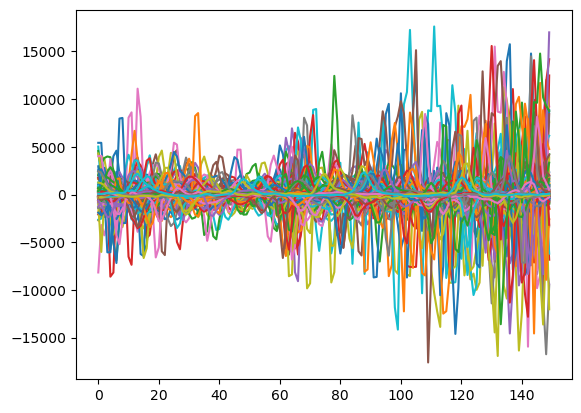

In [6]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

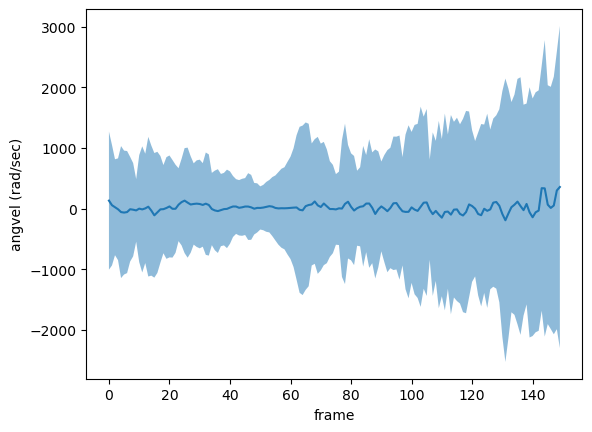

In [7]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

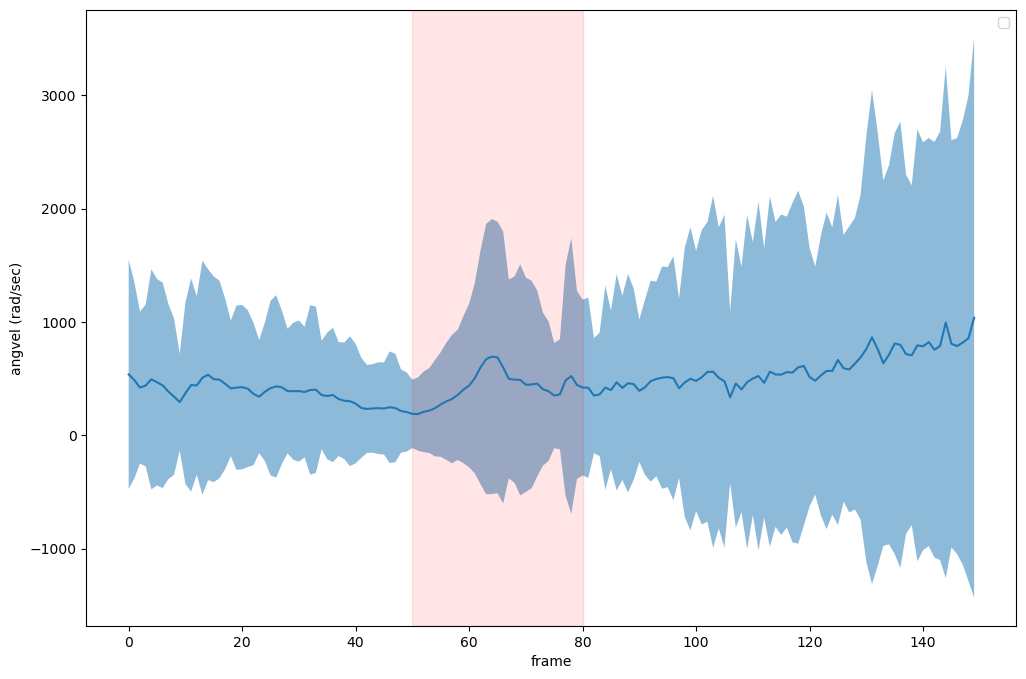

In [8]:
# Creating the plot with a specific figure size
plt.figure(figsize=(12, 8))
ax = plt.gca()  # Get current axes

# Plotting data and setting labels
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
ax.axvspan(50, 80, color='red', alpha=0.1)
ax.legend()
plt.show()

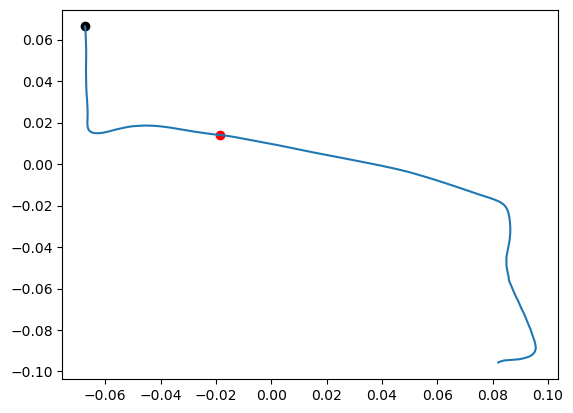

In [9]:
i = 7
traj = data["position"][i]

fig = plt.figure()
plt.plot(traj[:,0], traj[:,1])
plt.scatter(traj[50,0], traj[50,1], color="red")
plt.scatter(traj[0,0], traj[0,1], color="black")
plt.show()

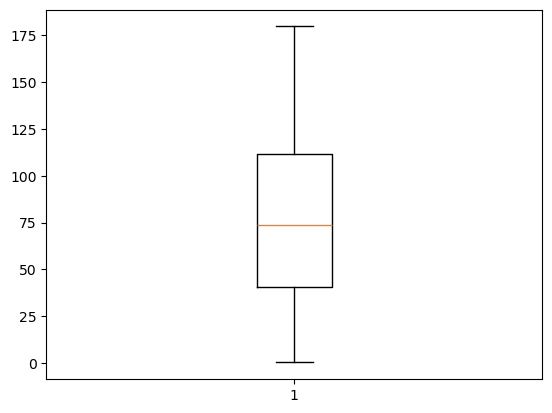

In [10]:
heading_diffs = []
for traj in data["position"]:
    heading_diffs.append(heading_direction_diff(traj, origin=50, end=80, n=10))

plt.figure()
plt.boxplot(np.abs(heading_diffs))
plt.show()


In [11]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241030_135421.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241030_135421.braidz using pyarrow


In [13]:
df,csvs["opto"]
data1 = extract_stimulus_centered_data(df, csvs["opto"])
AngV1 = data1['angular_velocity']

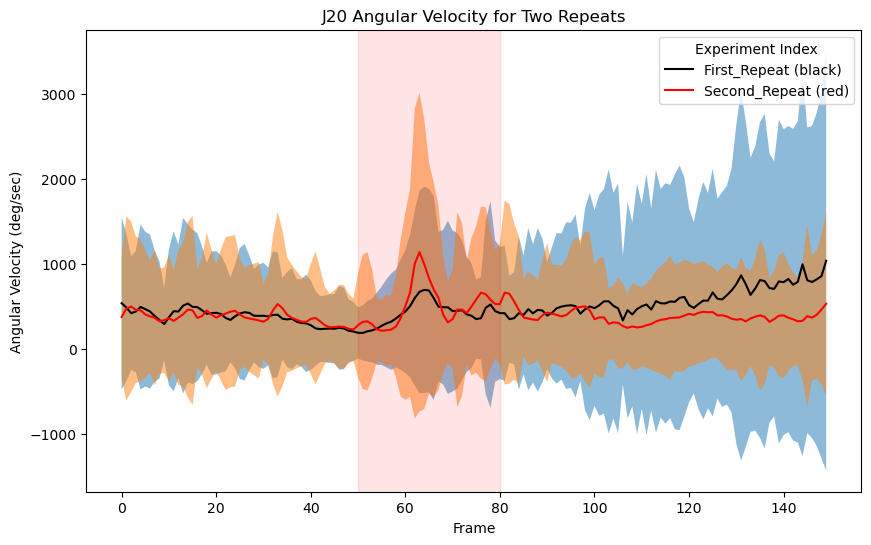

In [16]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the angular velocities with mean and std and adding labels directly
plot_mean_and_std(np.abs(AngV), ax=ax, label='First_Repeat (black)', color='black')
plot_mean_and_std(np.abs(AngV1), ax=ax, label='Second_Repeat (red)', color='red')


# Adding labels and title
ax.set_xlabel("Frame")
ax.set_ylabel("Angular Velocity (deg/sec)")
ax.set_title("J20 Angular Velocity for Two Repeats")

ax.axvspan(50, 80, color='red', alpha=0.1)

# Adding the legend to identify each curve
ax.legend(title="Experiment Index")

# Show the plot
plt.show()